In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<Axes: xlabel='purpose'>

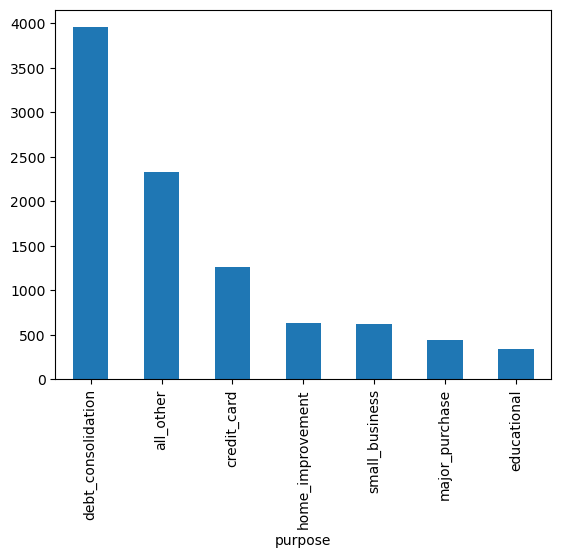

In [6]:
df['purpose'].value_counts().plot(kind='bar')

<Axes: xlabel='not.fully.paid'>

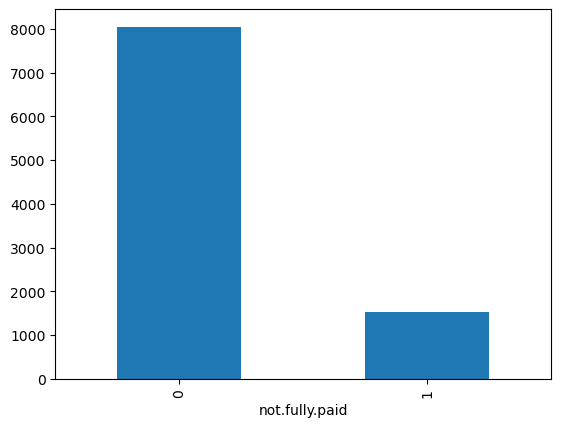

In [7]:
df['not.fully.paid'].value_counts().plot(kind='bar')

In [8]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
df['pub.rec'].value_counts()

pub.rec
0    9019
1     533
2      19
3       5
4       1
5       1
Name: count, dtype: int64

In [10]:
df['delinq.2yrs'].value_counts()

delinq.2yrs
0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: count, dtype: int64

In [11]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

int.rate, installment, log.annual.inc, fico(rat it ngoai lai)
days.with.cr.line, revol.bal, inq.last.6mths, delinq.2yrs(co it)

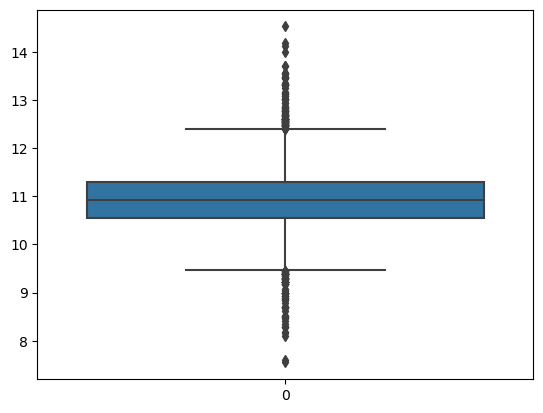

In [12]:
fig, axs = plt.subplots()
sns.boxplot(data=df["log.annual.inc"])
plt.show()

In [13]:
df_iqr = df.copy()

In [14]:
noise = ['int.rate','installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal', 'inq.last.6mths']
index = [1.43, 1.48, 1.455, 1.545, 1.32, 0.826, 2]
pos = 0

In [15]:
for _index in noise:
    q25, q75 = np.quantile(df_iqr[_index], 0.25), np.quantile(df_iqr[_index], 0.75)
    iqr = q75 - q25
    lower, upper = q25 - index[pos]*iqr, q75 + index[pos]*iqr
    df_iqr = df_iqr[(df_iqr[_index] < upper) & (df_iqr[_index] > lower)]
    pos += 1

In [16]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7232 entries, 2 to 9576
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7232 non-null   int64  
 1   purpose            7232 non-null   object 
 2   int.rate           7232 non-null   float64
 3   installment        7232 non-null   float64
 4   log.annual.inc     7232 non-null   float64
 5   dti                7232 non-null   float64
 6   fico               7232 non-null   int64  
 7   days.with.cr.line  7232 non-null   float64
 8   revol.bal          7232 non-null   int64  
 9   revol.util         7232 non-null   float64
 10  inq.last.6mths     7232 non-null   int64  
 11  delinq.2yrs        7232 non-null   int64  
 12  pub.rec            7232 non-null   int64  
 13  not.fully.paid     7232 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 847.5+ KB


In [17]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [18]:
df_iqr.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000,7232.000000
mean,0.862694,0.120230,291.862388,10.834321,12.217905,711.202848,4049.873519,8885.919801,45.013779,1.201466,0.165653,0.062500,0.140487
std,0.344194,0.025408,177.344629,0.499721,6.778868,37.658216,1911.208580,7405.220421,28.617486,1.340902,0.537045,0.261309,0.347515
min,0.000000,0.060000,15.690000,9.487972,0.000000,617.000000,180.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100800,159.740000,10.491274,6.880000,682.000000,2610.041667,2716.750000,21.075000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.121800,255.800000,10.819978,12.150000,707.000000,3810.041667,7076.000000,43.700000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.137900,396.170000,11.162346,17.472500,737.000000,5220.000000,13622.750000,67.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.191600,824.220000,12.323856,29.900000,817.000000,9420.000000,28895.000000,108.800000,5.000000,11.000000,4.000000,1.000000


In [19]:
# from sklearn.preprocessing import LabelEncoder
# encode = LabelEncoder()
# df_iqr['purpose'] = encode.fit_transform(df_iqr['purpose'])
cat_feats = ['purpose'] 
df_iqr = pd.get_dummies(df_iqr,columns=cat_feats,drop_first=True)

In [20]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7232 entries, 2 to 9576
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               7232 non-null   int64  
 1   int.rate                    7232 non-null   float64
 2   installment                 7232 non-null   float64
 3   log.annual.inc              7232 non-null   float64
 4   dti                         7232 non-null   float64
 5   fico                        7232 non-null   int64  
 6   days.with.cr.line           7232 non-null   float64
 7   revol.bal                   7232 non-null   int64  
 8   revol.util                  7232 non-null   float64
 9   inq.last.6mths              7232 non-null   int64  
 10  delinq.2yrs                 7232 non-null   int64  
 11  pub.rec                     7232 non-null   int64  
 12  not.fully.paid              7232 non-null   int64  
 13  purpose_credit_card         7232 non-n

In [21]:
x = df_iqr.drop('not.fully.paid', axis=1)
y = df_iqr['not.fully.paid']

In [22]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,True,False,False,False,False,False
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,False,True,False,False,False,False
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,False,False,False,False,False,False
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,False,False,False,False,False,False
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,False,False,False,False,False,False
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,False,False,False,False,False,False


In [23]:
y

2       0
4       0
6       1
7       1
9       0
       ..
9567    0
9570    1
9571    1
9574    1
9576    1
Name: not.fully.paid, Length: 7232, dtype: int64

In [24]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote1 = RandomOverSampler(random_state=1)
smote2 = SMOTE(random_state=1)
smote3 = ADASYN(random_state=1)
x1, y1 = smote1.fit_resample(x, y)
# x2, y2 = smote1.fit_resample(x, y)
# x3, y3 = smote1.fit_resample(x, y)

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler(feature_range=(-1, 1))
sc.fit(x1)
x1 = sc.transform(x1)

In [26]:
x1

array([[ 1.        ,  0.15045593, -0.13133712, ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  0.25531915, -0.78422569, ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  0.36170213, -0.55887846, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-1.        ,  0.27355623, -0.14842987, ..., -1.        ,
        -1.        , -1.        ],
       [-1.        ,  0.08206687, -0.87181675, ...,  1.        ,
        -1.        , -1.        ],
       [ 1.        , -0.19756839, -0.61191298, ..., -1.        ,
        -1.        , -1.        ]])

In [27]:
x1.shape, y1.shape

((12432, 18), (12432,))

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42, shuffle=True, stratify=y1)

In [29]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [30]:
x_train.shape, y_train.shape

((9945, 18), (9945,))

In [31]:
x_test.shape, y_test.shape

((2487, 18), (2487,))

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [33]:
_score = model.score(x_test, y_test)
print(_score)

0.9947728186570165


In [34]:
y_pred = model.predict(x_test)

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1231   13]
 [   0 1243]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1244
           1       0.99      1.00      0.99      1243

    accuracy                           0.99      2487
   macro avg       0.99      0.99      0.99      2487
weighted avg       0.99      0.99      0.99      2487



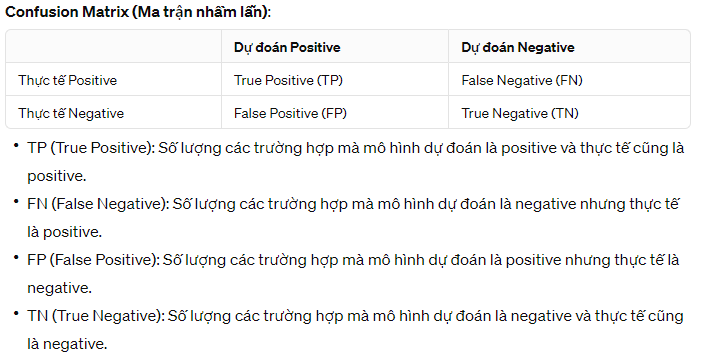
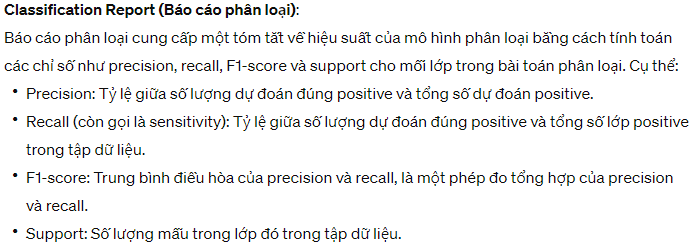

In [41]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_classification_results(y_test, y_pred):
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    
    # Vẽ ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

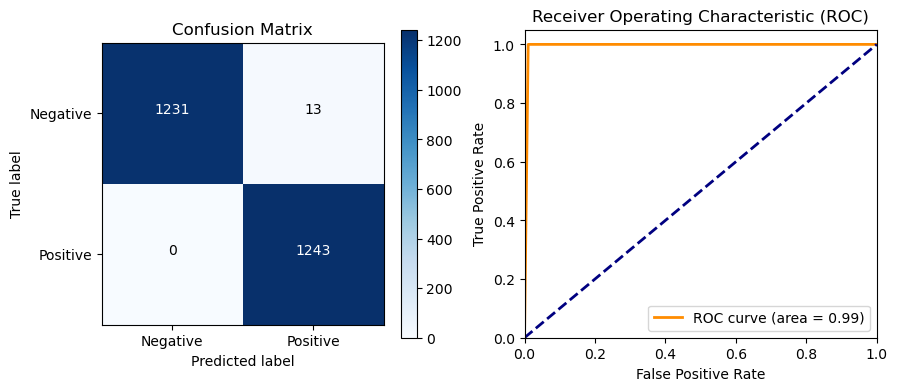

In [42]:
plot_classification_results(y_test, y_pred)

In [38]:
import random as rd
from math import*
number_test = rd.randint(0, x_test.shape[0])
x_inp = x_test[number_test]
x_inp = np.expand_dims(x_inp, axis=0)
y_real = y_test.iloc[number_test]
y_predic = model.predict(x_inp)
print('Predict Value: ', y_predic)
print('Reality Value: ', y_real)

Predict Value:  [1]
Reality Value:  1
